In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import random as rd

In [ ]:
def f(x,y): 
  # функция f из условия (если подставить в уравнение фунцию фи, то она не будет решением. 
  #Но если возвести знаменатель функции f в 3 степень, то получим, что фи есть решение.(думаю тут специальная опечатка от препода))
  return (4-3.2*x**2-4.8*y**2)/(1+x**2+y**2)**3

In [ ]:
def phi(x,y): # Функция фи из условия
    return 1.0/(1+x**2+y**2)

In [ ]:
#@title Начальные данные и создание сетки узлов 

In [ ]:
N = 4 # Количество разбиений по х (узлы будут нумероваться от 0 до N включительно) (ставь всегда четное значение >2 и если поставишь большое, то будет долго работать)
a = 0.9 
b = 1.1
N_big = (N//2+1)*(N+1)+(N//2+1)*(N//2) # количество узлов в области D
F = np.zeros(N_big) # вектор F из СЛАУ A*u=F
h = 1/N # шаг сетки

x = [i*h for i in range(N+1)] # разбиение по х
N_mass= [N//2+1 for i in range(0,N//2) ]+[N+1 for i in range(N//2,N+1,1) ] # массив количества узлов по у для каждого х_i
y = [list(np.zeros(i)) for i in N_mass] # создание и заполнения массива координат узлов по у 
for i in range(N//2):
    for j in range(N_mass[i]):
          y[i][j]=0.5+j*h
for i in range(N//2,N+1):
    for j in range(N_mass[i]):
          y[i][j]=j*h    
    
#print(N_big)

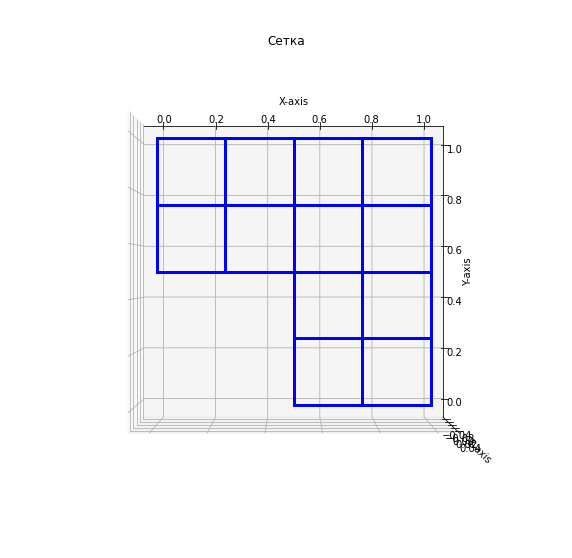

In [ ]:
#@title Сетка узлов
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
y_new=[]



for i in range(len(y)):
  x_new = [x[i]]*N_mass[i]
  ax.plot(x_new,y[i],np.zeros(len(x_new)), color='blue',lw=3)

for i in range(N//2+1):
  y_new = [y[0][i]]*(N//2+1)
  ax.plot(x[0:N//2+1],y_new,np.zeros(len(y_new)), color='blue',lw=3)

for i in range(0,N+1):
  x_new = x[N//2:N+1]
  y_new = [y[N][i]]*(N//2+1)
  ax.plot(x_new,y_new,np.zeros(len(y_new)), color='blue',lw=3)

plt.title("Сетка")
ax.view_init(90, 270)


plt.show()

In [ ]:
#заполняем вектор F
for i in range(0, N+1):
    for j in range(0,N_mass[i]):
      sum=0
      for k in range(0,i):
          sum+=N_mass[k]
      #print(sum+j)
      if(i==0):# левая граница
          F[sum+j]=phi(x[i],y[i][j])
      elif(i==N): #правая граница
          F[sum+j] = phi(x[i],y[N][j])
      elif(j==0): # нижняя граница
        F[sum+0] = phi(x[i],y[i][0])
      elif(j==N_mass[i]-1): # верхняя граница
        F[sum+j] = phi(x[i],1)
      elif((i==N//2) & (j<=N//2)): # mid boundary
        F[sum+j] = phi(x[i], y[i][j])
      else:
        #print(x[i],y[i][j])
        F[sum+j]=f(x[i], y[i][j]) # значения внутри области

In [ ]:
#@title создание матрицы А

In [ ]:
A = np.zeros((N_big,N_big)) # A*u = F

In [ ]:
for i in range(N+1):
    for j in range(N_mass[i]):
        if(i==0):
            A[j,j]=1
        else:
            if(i==N):
              sum=0
              for k in range(0,i):
                  sum+=N_mass[k]
              A[sum+j,sum+j]=1
            else:
                if(j==0):
                  sum=0
                  for k in range(0,i):
                    sum+=N_mass[k]
                  A[sum,sum]=1
                else:
                  if((i==N//2) & (j<=N//2)):
                    sum=0
                    for k in range(0,i):
                        sum+=N_mass[k]
                    A[sum+j,sum+j]=1
                  else:      
                      if(j==N_mass[i]-1):
                        sum=0
                        for k in range(0,i):
                            sum+=N_mass[k]
                        A[sum+j,sum+j]=1
                      else:
                        if((i==N//2) & (j>N//2)):
                          sum=0
                          for k in range(0,i):
                            sum+=N_mass[k]

                        
                          A[sum+j,sum+j]=2*(a+b)/(h**2)
                          A[sum+j,sum+j-1]=-b/(h**2)
                          A[sum+j,sum+j+1]=-b/(h**2)
                          A[sum+j,sum+j-N_mass[i]]=-a/(h**2)
                          A[sum+j,sum+j+N_mass[i]]=-a/(h**2)
                        else:
                          if((i==N//2-1)):
                            sum=0
                            for k in range(0,i):
                              sum+=N_mass[k]

                        
                            A[sum+j,sum+j]=2*(a+b)/(h**2)
                            A[sum+j,sum+j-1]=-b/(h**2)
                            A[sum+j,sum+j+1]=-b/(h**2)
                            A[sum+j,sum+j-N_mass[i]]=-a/(h**2)
                            A[sum+j,sum+j+N_mass[i+1]]=-a/(h**2)


                          else: 
                            sum=0
                            for k in range(0,i):
                              sum+=N_mass[k]
                            A[sum+j,sum+j]=2*(a+b)/(h**2)
                            A[sum+j,sum+j-1]=-b/(h**2)
                            A[sum+j,sum+j+1]=-b/(h**2)
                            A[sum+j,sum+j-N_mass[i]]=-a/(h**2)
                            A[sum+j,sum+j+N_mass[i]]=-a/(h**2)

In [ ]:
def dlina(v): # фунция для поиса длины вектора
    s=0
    for i in range(len(v)):
        s+=v[i]*v[i]
    return np.sqrt(s)

In [ ]:
#@title ЗАДАЧА 1: поиск максимального собственного числа с помощью метода Люстерникова

In [ ]:
def poisk_max():
    a1 = np.random.sample(N_big) # случайное приближение
    a1_0 =np.zeros(N_big)
    e=1e-3
    k_e = 1
    while(dlina(a1-a1_0)>e): # остановка, когда изменения становятся медленными. считаем, что метод сошелся.
        k_e+=1
        b2 = (a1/dlina(a1))
        a1_0=a1
        a1 = A.dot(b2)
        #print(dlina(a1_0-a1))
    alpha_big = dlina(a1)
    print(k_e)
    #print(dlina(a1))
    #print(np.linalg.eig(A)[0].max())
    return alpha_big

In [ ]:
#@title поиск минимального собственного числа с помощью метода Люстерникова

In [ ]:
def poisk_min(alpha_big): 
    E = np.eye(N_big)
    B  =alpha_big*E-A 
    a2 =  np.random.sample(N_big) # случайное приближение
    a2_0 = np.zeros(N_big)
    e = 1e-3
    k_e = 1
    while(dlina(a2_0-a2)>e): # остановка, когда изменения становятся медленными. считаем, что метод сошелся.
        k_e+=1
        b2 = (a2/dlina(a2))
        a2_0 = a2
        a2 = B.dot(b2)
        #print(dlina(a2_0-a2))

    alpha_min = dlina(a2)
    print(k_e)
    #print(dlina(a2))
    #print(np.linalg.eig(B)[0].max())
    alpha = alpha_big-alpha_min
    #print(alpha, np.linalg.eig(A)[0].min(), alpha_big, alpha_min)
    return alpha

In [ ]:
alpha_max = poisk_max() # альфа_макс - максимальное собственное значение

44


In [ ]:
alpha_min = poisk_min(alpha_max) # alpha_min - минимальное собственное значение

19


In [ ]:
print(alpha_max,alpha_min)

92.11521274985763 1.0002253552086273


In [ ]:
#@title ЗАДАЧА 2: Метод минимальных невязок

In [ ]:
def min_nev():
    x_n = np.random.sample(N_big) # случайное начальное приближение
    e = 1e-4 # точность
    v_1 =max(A.dot(x_n)-F)
    v_2 = 0
    k_e = 0
    while(abs(max(max(A.dot(x_n)-F), max(-A.dot(x_n)+F)))>e):
        k_e+=1
        if(v_2==v_1): # не все случайные приближения хороши, поэтому иногда можн разыграть начальное приближение заново
             x_n = np.random.sample(N_big)
             v_1 =max(A.dot(x_n)-F)
             v_2 = 0
        else:

          v_2=v_1
          v_1=max(A.dot(x_n)-F)
        #print(max(A.dot(x_n)-F))
        y_n = A.dot(x_n)-F
        tau_n = y_n.dot(A.dot(y_n)) / (A.dot(y_n)).dot(A.dot(y_n))
        x_n = x_n - tau_n*y_n
    #print(max(A.dot(x_n)-F))
    print(k_e) 
    return x_n

In [ ]:
u_n_1 = min_nev() # получаем вектор решения для всех узлов

55


In [ ]:
U_n_1 = [] # матрица решения 
for i in range(len(N_mass)):
  U_n_1.append((np.zeros(N_mass[i])))
U_n_1 = np.array(U_n_1,dtype=object)

In [ ]:
for i in range(0, N+1): # заполнение матрицы
    for j in range(0,N_mass[i]):
      sum=0
      for k in range(0,i):
        sum+=N_mass[k]
      U_n_1[i][j] = u_n_1[sum+j]

In [ ]:
#@title Графики

In [ ]:
#@title аналитическое решение и найденное

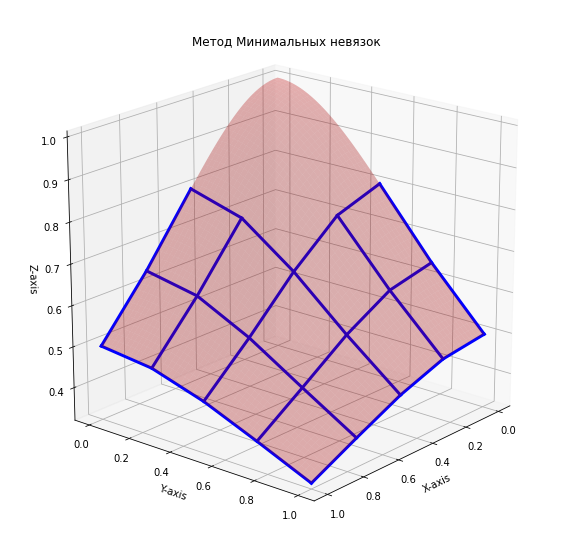

In [ ]:


fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
y_new=[]

# точное решение
N_3 = 100

u = np.linspace(0,1,N_3)
v = u
x_3,y_3 = np.meshgrid(u,v)
U_3 = phi(x_3,y_3)
ax.plot_surface(x_3,y_3,U_3, color='red', alpha=0.3)

# найденное
for i in range(len(y)):
  x_new = [x[i]]*N_mass[i]
  ax.plot(x_new,y[i],U_n_1[i], color='blue',lw=3)

for i in range(N//2+1):
  y_new = [y[0][i]]*(N//2+1)
  u_n_f =[]
  for j in range(0,N//2):
    u_n_f+=[U_n_1[j][i]]
  u_n_f+=[U_n_1[N//2][N//2+i]]
  ax.plot(x[0:N//2+1],y_new,u_n_f, color='blue',lw=3)

for i in range(0,N+1):
  x_new = x[N//2:N+1]
  y_new = [y[N][i]]*(N//2+1)
  u_n_f =[]
  for j in range(N//2,N+1):
    u_n_f+=[U_n_1[j][i]]
  
  ax.plot(x_new,y_new,u_n_f, color='blue',lw=3)

plt.title("Метод Минимальных невязок")
ax.view_init(20, 40)


plt.show()

In [ ]:
#@title глобальная ошибка поиск во всех узлах сетки 
max_oshibka = 0
for i in range(N+1):
  for j in range(N_mass[i]):
      max_oshibka = max(abs(phi(x[i],y[i][j])-U_n_1[i][j]),max_oshibka)
      
print(max_oshibka)

0.0008266801730354434


Для того, чтобы найти относительную ошибку для разного числа отрезов (m или N) нужно запускать программу несколько раз с разными N и сохранять себе куда-то значение ниже

In [ ]:
#@title глобальная относительная ошибка поиск во всех узлах сетки 
max_oshibka = 0
for i in range(N+1):
  for j in range(N_mass[i]):
      max_oshibka = max(abs(phi(x[i],y[i][j])-U_n_1[i][j])/abs(phi(x[i],y[i][j])),max_oshibka)
      
print(max_oshibka)

0.0017566953677003172


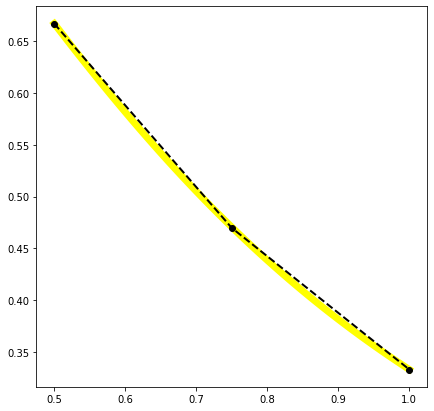

In [ ]:
y_new =[]
fig = plt.figure(figsize=(7, 7))

x_new = [x[i] for i in range(N//2,N+1)]
x_new_toch = np.arange(0.5,1.01,0.01)
y_new_toch = phi(x_new_toch,x_new_toch)
for i in range(N//2,N+1):
  y_new+=[U_n_1[i][i]]
  

plt.plot(x_new_toch,y_new_toch, lw =7, color = 'yellow')
plt.plot(x_new,y_new, lw = 2, linestyle = '--', marker='o', color = 'black')


In [ ]:
#@title Метод ричардсона с чебышевскими параметрами

In [ ]:
def met_rich():
    e = 1e-3
    tau_0 = 2/(alpha_max+alpha_min)
    etta = alpha_min/alpha_max
    p_0 = (1-etta)/(1+etta)
    p_1 = (1-np.sqrt(etta))/(1+np.sqrt(etta))
    n_0 = 2*int(np.log(2/e)/(np.log(1/p_1)))+1
    n_0 = 1000*n_0
    #print(n_0)
    x_n = np.random.sample(N_big)
    v_1 =max(A.dot(x_n)-F)
    v_2 = 0
    while(max(A.dot(x_n)-F)>e):
        if(v_2==v_1):
             x_n = np.random.sample(N_big)
             v_1 =max(A.dot(x_n)-F)
             v_2 = 0
        else:
          v_2=v_1
          v_1=max(A.dot(x_n)-F)
        #print(max(A.dot(x_n)-F))
        y_n = A.dot(x_n)-F
        v_k = np.cos((2*i-1)*np.pi)/(2*n_0)
        tau_n = tau_0/(1+p_0*v_k) 
        x_n = x_n - tau_n*y_n
    #print(max(A.dot(x_n)-F))
    return x_n

In [ ]:
u_n_2 = met_rich() # получаем вектор решения для всех узлов

In [ ]:
U_n_2 = [] # матрица решения 
for i in range(len(N_mass)):
  U_n_2.append((np.zeros(N_mass[i])))
U_n_2 = np.array(U_n_2,dtype=object)

In [ ]:
for i in range(0, N+1): # заполнение матрицы
    for j in range(0,N_mass[i]):
      sum=0
      for k in range(0,i):
        sum+=N_mass[k]
      U_n_2[i][j] = u_n_2[sum+j]

In [ ]:
#@title Графики

In [ ]:
#@title аналитическое решение и найденное

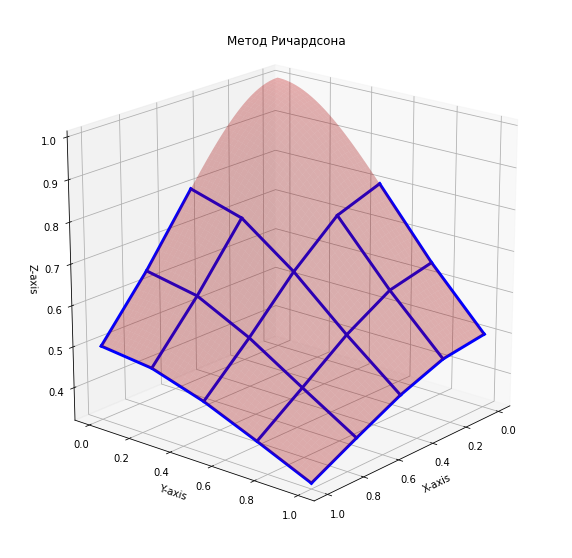

In [ ]:


fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
y_new=[]

# точное решение
N_3 = 100

u = np.linspace(0,1,N_3)
v = u
x_3,y_3 = np.meshgrid(u,v)
U_3 = phi(x_3,y_3)
ax.plot_surface(x_3,y_3,U_3, color='red', alpha=0.3)

# найденное
for i in range(len(y)):
  x_new = [x[i]]*N_mass[i]
  ax.plot(x_new,y[i],U_n_2[i], color='blue',lw=3)

for i in range(N//2+1):
  y_new = [y[0][i]]*(N//2+1)
  u_n_f =[]
  for j in range(0,N//2):
    u_n_f+=[U_n_2[j][i]]
  u_n_f+=[U_n_2[N//2][N//2+i]]
  ax.plot(x[0:N//2+1],y_new,u_n_f, color='blue',lw=3)

for i in range(0,N+1):
  x_new = x[N//2:N+1]
  y_new = [y[N][i]]*(N//2+1)
  u_n_f =[]
  for j in range(N//2,N+1):
    u_n_f+=[U_n_2[j][i]]
  
  ax.plot(x_new,y_new,u_n_f, color='blue',lw=3)

plt.title("Метод Ричардсона")
ax.view_init(20, 40)


plt.show()

In [ ]:
#@title глобальная ошибка поиск во всех узлах сетки 
max_oshibka = 0
for i in range(N+1):
  for j in range(N_mass[i]):
      max_oshibka = max(abs(phi(x[i],y[i][j])-U_n_2[i][j]),max_oshibka)
      
print(max_oshibka)

0.000831563450124917


Для того, чтобы найти относительную ошибку для разного числа отрезов (m или N) нужно запускать программу несколько раз с разными N и сохранять себе куда-то значение ниже

In [ ]:
#@title глобальная относительная ошибка поиск во всех узлах сетки 
max_oshibka = 0
for i in range(N+1):
  for j in range(N_mass[i]):
      max_oshibka = max(abs(phi(x[i],y[i][j])-U_n_2[i][j])/abs(phi(x[i],y[i][j])),max_oshibka)
      
print(max_oshibka)

0.0017140088743092668


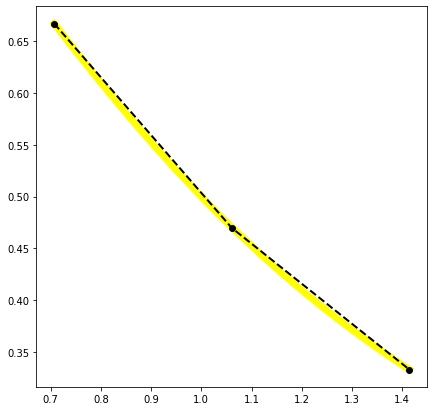

In [ ]:
y_new =[]
fig = plt.figure(figsize=(7, 7))

x_new = [x[i]*np.sqrt(2) for i in range(N//2,N+1)]
x_new_toch = np.arange(0.5,1.01,0.01)
y_new_toch = phi(x_new_toch,x_new_toch)
x_new_toch = [x*np.sqrt(2) for x in x_new_toch]
for i in range(N//2,N+1):
  y_new+=[U_n_2[i][i]]
  

plt.plot(x_new_toch,y_new_toch, lw =7, color = 'yellow')
plt.plot(x_new,y_new, lw = 2, linestyle = '--', marker='o', color = 'black')
